In [2]:
from keras.layers import *
from keras.models import Sequential


model = Sequential()
model.add(Conv2D(10,3,3,input_shape = (240,240,3)))
model.add(Conv2D(7,5,5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.1))

model.summary()


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(240, 240,...)`
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(7, (5, 5))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 238, 10)      280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 234, 234, 7)       1757      
_________________________________________________________________
batch_normalization_1 (Batch (None, 234, 234, 7)       28        
_________________________________________________________________
flatten_1 (Flatten)          (None, 383292)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               38329300  
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
Total params: 38,331,365
Trainable params: 38,331,351
Non-trainable params: 14
_______________________________________________________________

In [3]:
model.layers

In [15]:
for layer in model.layers:
    print(layer.name)

conv2d_1
conv2d_2
batch_normalization_1
flatten_1
dense_1
dropout_1


In [107]:

kernels, bias = model.layers[1].get_weights()
print(kernels.shape)

(5, 5, 10, 7)


In [108]:
def visualize_kernels(kernels,pad):
    # info of the kernel
    H,W,_,__ = kernels.shape
    # normalize the filters
    mi,ma = kernels.min(),kernels.max()
    kernels = (kernels - mi) / (ma - mi)
    # expand the first dimension into a multiple of 3
    num_pad = kernels.shape[0] % 3
    if num_pad > 0 :
        pad_time = 3 - num_pad
        kernels = np.pad(kernels,((0,pad_time),(0,0),(0,0),(0,0)),mode = 'edge')
    
    # reshape the kernel so that the first channel is 3 (r,g,b)
    kernels = kernels.reshape(3,H,W,-1)
    
    # sanity check on the dimension of the resultant kernel 
    # evaluate the size of kernels
    kern_height,H,W,num_kernels = kernels.shape
    lo_c = int(np.sqrt(num_kernels))
    hi_c = lo_c + 1
    
    output_height = (hi_c) * H + pad * (hi_c + 1)
    output_width = lo_c * W + pad * (lo_c + 1)
    
    output = np.zeros((output_height,output_width,3)) # TODO: flatten this!
    # iterate on the coordinates of output
    kern_id = 0
    for i in range(pad,output_height,H + pad):
        for j in range(pad,output_width,W + pad):
            patch = kernels[:,:,:,kern_id].transpose(1,2,0)
            output[i:(i + H),j:(j + W),:] = kernels[:,:,:,kern_id].transpose(1,2,0)
            kern_id += 1
            if kern_id >= kernels.shape[-1]: break
        if kern_id >= kernels.shape[-1]: break

    return output

In [109]:
output = visualize_kernels(kernels,2)

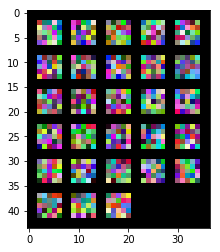

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(output)